# Задание 1
Напиши функцию, которая удалит дубликаты в списке. Список не отсортирован. Необходимо сохранить порядок сортировки оригинального списка.

Примеры:
- \[1, 2, 3, 1\] → \[1, 2, 3\]
- \[1, 3, 2, 1, 5, 3, 5, 1, 4\] → \[1, 3, 2, 5, 4\]

Какая асимптотическая сложность у этой функций?

In [1]:
def remove_duplicate_from_list(a):
    first_index_for_item = {}
    for i in range(len(a)):
        if a[i] not in first_index_for_item:
           first_index_for_item[a[i]] = i

    result = []
    for i in range(len(a)):
        if i == first_index_for_item[a[i]]:
            result.append(a[i])
    
    return result

In [2]:
remove_duplicate_from_list([1, 2, 3, 1])

[1, 2, 3]

In [3]:
remove_duplicate_from_list([1, 3, 2, 1, 5, 3, 5, 1, 4])

[1, 3, 2, 5, 4]

# Задание 2
Дана таблица employees всех сотрудников компании.

Поля:
- full_name TEXT (PK)
- position TEXT
- department TEXT

Напиши запрос, выводящий все отделы, в которых меньше 5 разработчиков (position = 'Software Developer').

```sql
SELECT department, COUNT(*) AS count 
FROM employees
WHERE position = 'Software Developer'
GROUP BY department
HAVING count < 5
```

# Задание 3
Подкинули монету N раз. Количество случаев, когда выпал орёл, на 10% больше, чем количество случаев, когда выпала решка. При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?

Пусть $N_h$ - количество выпадений орла, а $N_t$ - количество выпадений решки, тогда $N = N_h + N_t$ - количество бросков монеты.

Известно, что $N_h = 1.1 \cdot N_t$. $N_h, N_t, N \in \mathbb{N} \Rightarrow N_h = 10 \cdot k$, где $k \in \mathbb{N}$.

Однозначно заявить, что монета "нечестная" нельзя. Сколько бы испытаний не производилось, любой из исходов мог бы произойти с определенной вероятностью.

В данном случае можно назвать монету "нечестной" только на каком-либо уровне статистической значимости.

Сформулируем гипотезы:
- $H_0$ - монета "честная"
- $H_1$ - монета "нечестная"

Важно заметить, что здесь используется двухсторонняя альтернативная гипотеза, так как в данном случае не имеет значения "дефект" монеты, то есть в какую сторону смещение - орла или решки.

Если нулевая гипотеза справедлива, то вероятности выпадения орла и решки: $p_h = p_t = \frac{1}{2}$, а сам процесс многократного подбрасывания монеты представляется из себя *испытания Бернулли*. Рассмотрим случайную величину (СВ) $X$ - количество выпадений орла. 

Данная СВ распределена по биномиальному закону с математиечским ожиданием $N \cdot p_h$ и дисперсией $N \cdot p_h \cdot (1 - p_h)$.

Для проверки гипотез воспользуемся **Python** и библиотекой **scipy.stats** для проведения *биномиального теста*. Уровень значимости возьмем $\alpha = 0.05$.

In [4]:
import numpy as np
from scipy import stats

In [14]:
k = 1
n_t = 10 * k
n_h = int(1.1 * n_t)
n = n_h + n_t

p_t = 0.5

p = 1.0
alpha = 0.05

while p >= alpha:
    p = stats.binom_test(n_h, n, p_t, alternative = 'two-sided')

    k += 1
    n_t = 10 * k
    n_h = int(1.1 * n_t)
    n = n_h + n_t

print('Количество испытаний, позволяющее отвергнуть нулевую гипотезу на уровне значимости 0.05:', n)

Количество испытаний, позволяющее отвергнуть нулевую гипотезу на уровне значимости 0.05: 1764


In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


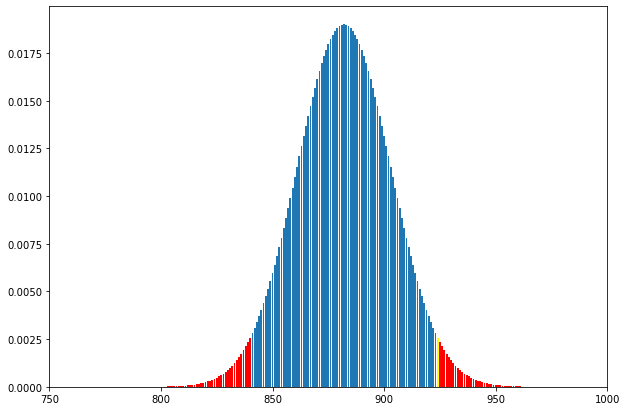

In [12]:
F_H0 = stats.binom(n, 0.5)

x = np.linspace(0, n, n + 1)

pylab.figure(figsize=(10, 7))

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(n_h, n, n_t + 1), F_H0.pmf(np.linspace(n_h, n, n_t + 1)), align = 'center', color='red')
pylab.bar(np.linspace(0, n_t, n_t + 1), F_H0.pmf(np.linspace(0, n_t, n_t + 1)), align = 'center', color='red')
pylab.bar(n_h, F_H0.pmf(n_h), align = 'center', color = 'yellow')

xlim(750, 1000)
pylab.show()

**Ответ:** $N = 1764$.